## Last Name: Paithankar
## First Name: Sharvita

## CSCI 4580/5580 - Data Science – Fall 2020
## Lab 2: Exploratory Data Analysis

For this lab, we'll explore some data from a very useful source, the UC Irvine machine learning data repository.

Go to https://archive.ics.uci.edu/ml/datasets/Heart+Disease
and read the dataset description. 

Now dowload the dataset (processed.cleveland.data) from the Canvas and save it into the same directory as this notebook.

Next, read the data into python and create a variable "cleveland_raw_data" which is a list of rows from this dataset. Each row should be a list of string values returned by the csv file reader.

In [1]:
import csv

with open("processed.cleveland.data") as csvfile:
    cleveland_raw_data = list(csv.reader(csvfile))    

print(f'this data set has {len(cleveland_raw_data)} rows. The 88th line is:{cleveland_raw_data[87]}')

this data set has 303 rows. The 88th line is:['53.0', '0.0', '3.0', '128.0', '216.0', '0.0', '2.0', '115.0', '0.0', '0.0', '1.0', '0.0', '?', '0']


## Data Cleaning

First we have to clean and sanitize the data. This data is pretty clean and is mostly numeric but contains some '?' in some fields.

<b>Q1)</b> To make it easier to handle, we convert those fields to 'None'. For convenience, you should define a function "safeFloat" that takes a string argument, and returns None if the argument is '?', otherwise the float value of the string. [5 points]

In [3]:
def safeFloat(x):   
    # complete this function
        if x == "?" :
            return None;
        else:
            return float(x);
    

In [107]:
cleveland_data = [[safeFloat(x) for x in y] for y in cleveland_raw_data]
cleveland_data[87]

[63.0, 1.0, 1.0, 145.0, 233.0, 1.0, 2.0, 150.0, 0.0, 2.3, 3.0, 0.0, 6.0, 0.0]


In the dataset summary, the following are the column names. 

In [12]:
headers = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
print(headers)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


Now we construct a dictionary mapping these header names to the column numbers 0...13:

In [64]:
headerIndexMap = dict(zip(headers, range(len(headers))))    
print(headerIndexMap)

{'age': 0, 'sex': 1, 'cp': 2, 'trestbps': 3, 'chol': 4, 'fbs': 5, 'restecg': 6, 'thalach': 7, 'exang': 8, 'oldpeak': 9, 'slope': 10, 'ca': 11, 'thal': 12, 'num': 13}


In [110]:
import pandas as pd
def getColumn(name): 
    # complete this funtion
    index = headerIndexMap.get(name);
    col = []
    for i in cleveland_data:
        col.append(i[index])
    return col

In [111]:
print(getColumn('age'))

[63.0, 67.0, 67.0, 37.0, 41.0, 56.0, 62.0, 57.0, 63.0, 53.0, 57.0, 56.0, 56.0, 44.0, 52.0, 57.0, 48.0, 54.0, 48.0, 49.0, 64.0, 58.0, 58.0, 58.0, 60.0, 50.0, 58.0, 66.0, 43.0, 40.0, 69.0, 60.0, 64.0, 59.0, 44.0, 42.0, 43.0, 57.0, 55.0, 61.0, 65.0, 40.0, 71.0, 59.0, 61.0, 58.0, 51.0, 50.0, 65.0, 53.0, 41.0, 65.0, 44.0, 44.0, 60.0, 54.0, 50.0, 41.0, 54.0, 51.0, 51.0, 46.0, 58.0, 54.0, 54.0, 60.0, 60.0, 54.0, 59.0, 46.0, 65.0, 67.0, 62.0, 65.0, 44.0, 65.0, 60.0, 51.0, 48.0, 58.0, 45.0, 53.0, 39.0, 68.0, 52.0, 44.0, 47.0, 53.0, 53.0, 51.0, 66.0, 62.0, 62.0, 44.0, 63.0, 52.0, 59.0, 60.0, 52.0, 48.0, 45.0, 34.0, 57.0, 71.0, 49.0, 54.0, 59.0, 57.0, 61.0, 39.0, 61.0, 56.0, 52.0, 43.0, 62.0, 41.0, 58.0, 35.0, 63.0, 65.0, 48.0, 63.0, 51.0, 55.0, 65.0, 45.0, 56.0, 54.0, 44.0, 62.0, 54.0, 51.0, 29.0, 51.0, 43.0, 55.0, 70.0, 62.0, 35.0, 51.0, 59.0, 59.0, 52.0, 64.0, 58.0, 47.0, 57.0, 41.0, 45.0, 60.0, 52.0, 42.0, 67.0, 55.0, 64.0, 70.0, 51.0, 58.0, 60.0, 68.0, 46.0, 77.0, 54.0, 58.0, 48.0, 57.0, 52.

## Basic Statistics

What is the minimum, maximum, mean and standard deviation of the age of this set of subjects? Use the numpy package with contains the mean() and std() functions. 

In [112]:
import numpy as np
age = getColumn('age')
[min(age), max(age), np.mean(age), np.std(age)]

[29.0, 77.0, 54.43894389438944, 9.02373483119838]

<b>Q3)</b> Next, define a function named "select" which given a column name and a predicate, returns the values of that column at rows for which the predicate is true. Each predicate is a tuple of two elemetns, where the first element is the column name, and the second element is the filter value. For example select('age', ('sex', 0)), returns the age of subjects with sex=0 (the female subjects). [15 points] 

In [146]:
def select(columnName, predicate):
    index = headerIndexMap.get(columnName);
    predIndex = headerIndexMap.get(predicate[0])
    col = []
    for i in cleveland_data:
        if i[predIndex] == predicate[1]:
            col.append(i[index])
    return col

In [145]:
print(select('age', ('sex',1))) # returns the age of male subjecs

[63.0, 67.0, 67.0, 37.0, 56.0, 63.0, 53.0, 57.0, 56.0, 44.0, 52.0, 57.0, 48.0, 54.0, 49.0, 64.0, 58.0, 58.0, 60.0, 43.0, 40.0, 60.0, 64.0, 59.0, 44.0, 42.0, 43.0, 57.0, 55.0, 61.0, 40.0, 59.0, 58.0, 51.0, 50.0, 53.0, 65.0, 44.0, 44.0, 60.0, 54.0, 50.0, 41.0, 54.0, 51.0, 58.0, 54.0, 60.0, 60.0, 54.0, 59.0, 46.0, 67.0, 62.0, 65.0, 44.0, 60.0, 48.0, 58.0, 45.0, 39.0, 68.0, 52.0, 44.0, 47.0, 66.0, 62.0, 52.0, 59.0, 52.0, 48.0, 45.0, 34.0, 49.0, 54.0, 59.0, 57.0, 61.0, 39.0, 56.0, 52.0, 41.0, 58.0, 63.0, 65.0, 48.0, 51.0, 55.0, 65.0, 54.0, 44.0, 54.0, 51.0, 29.0, 51.0, 70.0, 62.0, 35.0, 51.0, 59.0, 59.0, 52.0, 64.0, 58.0, 47.0, 57.0, 41.0, 45.0, 52.0, 55.0, 64.0, 70.0, 51.0, 58.0, 60.0, 68.0, 46.0, 77.0, 48.0, 57.0, 52.0, 35.0, 70.0, 53.0, 64.0, 57.0, 52.0, 56.0, 43.0, 53.0, 48.0, 42.0, 59.0, 42.0, 66.0, 54.0, 69.0, 50.0, 51.0, 43.0, 67.0, 69.0, 59.0, 57.0, 43.0, 45.0, 58.0, 50.0, 55.0, 38.0, 41.0, 52.0, 56.0, 59.0, 53.0, 47.0, 54.0, 66.0, 49.0, 54.0, 56.0, 46.0, 42.0, 41.0, 61.0, 67.0, 58.

<b>Q4)</b> Now use the np package and the select function and display the mean age of male and female subjects [15 points]

In [165]:
import numpy as np
male_age = np.mean(select('age', ('sex',1)))
female_age = np.mean(select('age', ('sex',0)))
print(f'average male age={male_age}\naverage female age={female_age}')

average male age=53.83495145631068
average female age=55.72164948453608


## Histograms of Data Fields

Plot the histograms of age.

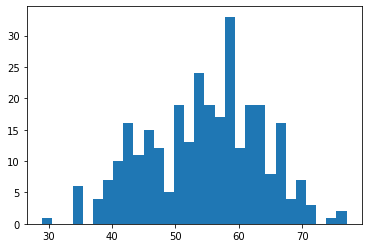

In [172]:
import matplotlib.pyplot as plt
plt.hist(age, 30)
plt.show()

<b>Q5)</b> now plot the histogram of resting blood pressure (trestbps). [5 points]

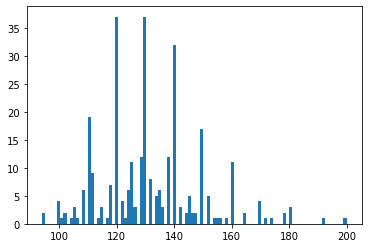

In [177]:
import matplotlib.pyplot as plt
TBS= getColumn('trestbps')
plt.hist(TBS, 100)
plt.show()

## Scatter Plots

Make scatter plot of age vs bp (resting blood pressure) 

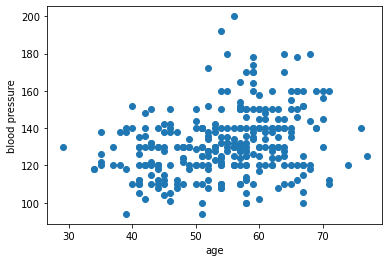

In [178]:
TBS= getColumn('trestbps')
plt.scatter(age, TBS)
plt.xlabel('age')
plt.ylabel('blood pressure')
plt.show()

<b>Q6)</b> Make scatter plot of age vs thalach (max heart rate) [5 points]

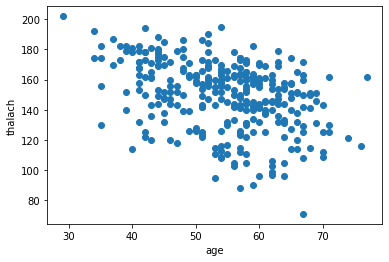

In [179]:
# add your code here
thalach= getColumn('thalach')
plt.scatter(age, thalach)
plt.xlabel('age')
plt.ylabel('thalach')
plt.show()

We can augment the basic scatter plots with other information that might be relevant. In the plot below, we used the 'num' field to color the dots. num is an integer indicating the degree of heart disease from 0...4. We also make the dots larger with the s= argument to make the colors easier to see. 

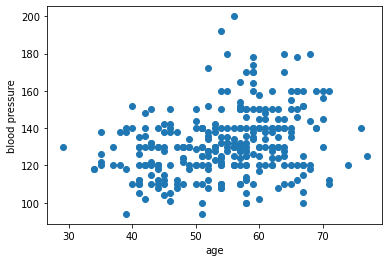

In [184]:
bps= getColumn('trestbps')
plt.scatter(age, bps, c=getColumn('num'), s=50)
plt.xlabel('age')
plt.ylabel('blood pressure')
plt.show()

To figure out what color encodes what value, we can do a simple plot of the values 0...4

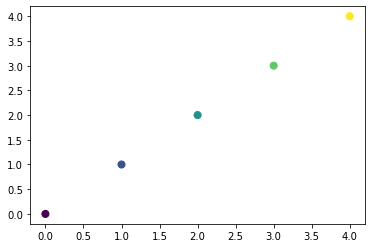

In [181]:
plt.scatter(range(5), range(5), c=range(5), s=50)
plt.show()

<b>Q7)</b> Now use the select function and draw a scatter plot for age vs blood pressure only for the patients with num=2. [20 points]

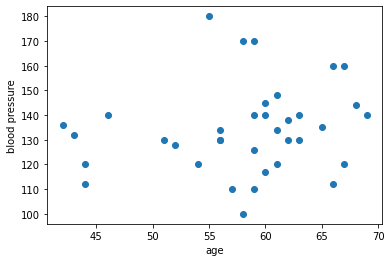

In [192]:
# add your code here
age= select('age', ('num', 2))
bps= select('trestbps', ('num', 2))
plt.scatter(age, bps)
plt.xlabel('age')
plt.ylabel('blood pressure')
plt.show()

These scatter plots seem to show trends. To make those clearer we can overlay regression lines. The regression line minimizes the total squared vertical distance from the line to the data points, and shows the general trend for the data. 

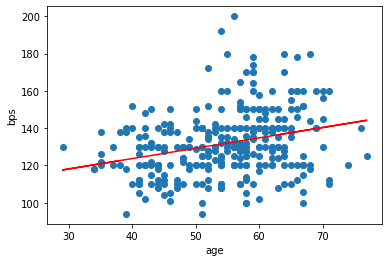

In [194]:
# for numpy we need arrays instead of lists of values
age = np.array(getColumn('age'))
bps = np.array(getColumn('trestbps'))

plt.scatter(age, bps)
plt.xlabel('age')
plt.ylabel('bps')
m, b = np.polyfit(age, bps, 1)
plt.plot(age, m*age + b, '-', color='red')
plt.show()

<b>Q8)</b> Now draw a scatter plot for age vs max heart rate and add the regression line.[5 points]

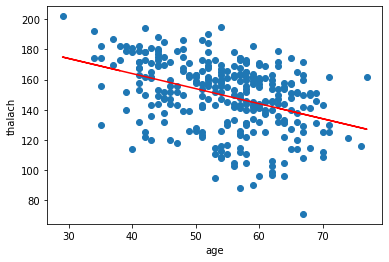

In [201]:
# add your code here
age = np.array(getColumn('age'))
bps = np.array(getColumn('thalach'))

plt.scatter(age, bps)
plt.xlabel('age')
plt.ylabel('thalach')
m, b = np.polyfit(age, bps, 1)
plt.plot(age, m*age + b, '-', color='red')
plt.show()

## Critical Thinking with Data

The following scatter plot and regression line shows the relationship between blood pressure (X-axis) and heart disease (Y-axis). 

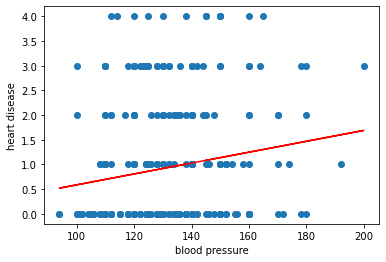

In [195]:
num = np.array(getColumn('num'))
factor = bps

plt.scatter(factor, num)
plt.xlabel('blood pressure')
plt.ylabel('heart disease')
m, b = np.polyfit(factor, num, 1)
plt.plot(factor, m*factor + b, '-', color='red')
plt.show()

Now consider this plot of age versus num:

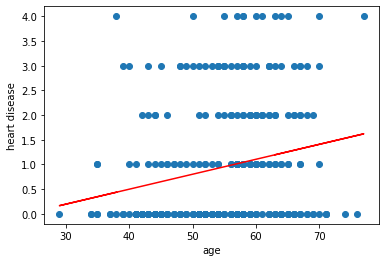

In [196]:
num = np.array(getColumn('num'))
factor = age

plt.scatter(factor, num)
plt.xlabel('age')
plt.ylabel('heart disease')
m, b = np.polyfit(factor, num, 1)
plt.plot(factor, m*factor + b, '-', color='red')
plt.show()

<b>Q9)</b> Based on the above plots, what's the overall effect of age and bps on heart disease? [5 points]
<br/>Answer: Based on the above plots, it can be concluded that the higher the age and bps, the more chances of having a heart disease. Since the heart diseases increase as the age increses and the the higher the blood pressure, the more the heart diseases, we can definitely say that the higher the age/bps, the more chances of having a heart disease.

## Dimensionality Reduction

Recall that dimensionality reduction allows you to look at the dominant factors in high-dimensional data. Matplotlib includes the PCA function for this purpose. You use it like this:

In [198]:
from sklearn import decomposition
cleveland_matrix = np.array(cleveland_data, dtype=np.float64) # First put the data in a 2D array of double-precision floats
pca = decomposition.PCA(n_components=2)
pcs = pca.fit_transform(cleveland_matrix[:,0:8]) # leave out columns with None in them

<b>Q10)</b> In order to see the relationship between the two main principal components, draw a scatter plot and add the regression line. [10 points]

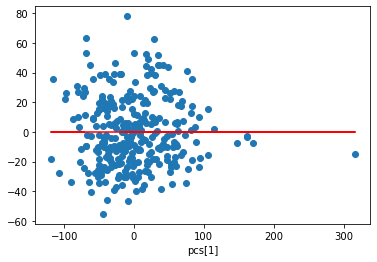

In [202]:
# add your code here
x =[]
y =[]
for i in pcs:
    x.append(i[0])
    y.append(i[1])
yArray = np.array(y)
plt.scatter(x,y)
plt.xlabel('pcs[0]')
plt.xlabel('pcs[1]')
m, b = np.polyfit(x,y,1)
plt.plot(x,m*yArray +b, '-', color = 'red')
plt.show()

## Text Data Processing

Download the NY times Dataset from Canvas and save it to the same directory as this notebook.

This file has 3 header lines: num docs, num distinct words, num total words. The following lines represent the documents with three fields:

> docid wordid wordcount

We can read the file with a csv reader:

In [ ]:
with open("docword.nips.txt") as csvfile:
    ndocs = int(csvfile.readline())
    nwords = int(csvfile.readline())
    nnz = int(csvfile.readline())
    nips_raw_data = list(csv.reader(csvfile, delimiter=' '))
    
nips_data = [[int(x) for x in y] for y in nips_raw_data] # convert from string to numeric data

In [ ]:
[ndocs, nwords, nnz]

Now we're going to create an array 'counts' containing the counts for each word over all documents. Note that we use 'row[1]-1' as the index. The docword files use 1-based array indexing, but python uses zero-based indexing. 

In [ ]:
counts = [0] * nwords
for row in nips_data:
    counts[row[1]-1] += row[2] # increment the count for this word by the value in the third column

Next we zip the word index as the first column, and sort this table by word count in descending order.

In [ ]:
import operator
wordtab = list(zip(range(nwords), counts))
wordtab.sort(key=lambda x: x[1], reverse=True)

The top (first) values in this list are the most frequent word ids (first column), and their counts (second column):

In [ ]:
wordtab[0:8]

Now grab the vocabulary file for nips from Canvas and save it to the same directory as this notebook.
Run the following to load it and create a dictionary (word -> wordid) and inverse dictionary (wordid -> word) from it. 

In [ ]:
mydict = {}            # word dictionary
words = [''] * nwords  # invese dictionary - just an array of strings
i = 0
with open("vocab.nips.txt") as txtfile:
    for line in txtfile:
        word = line.rstrip('\n')
        mydict[word] = i
        words[i] = word
        i += 1

Now we can find the top words using the inverse dictionary:

In [ ]:
topwords = [words[x] for x,y in wordtab[0:10]]
topwords

<b>Q11)</b>: What do you think is the topic of the NIPS dataset? [5 points]
<br/>Answer: The top words are : network, model, learning, function, input, neural, set, algorithm, system and data. I beleieve that these are words are related to NIPS(Neural Information Processing Systems). The way this algorithm runs is a way of writing a machine learning algorithm. 

Finally, we can plot the counts words in rank order (decreasing order of frequency).

In [ ]:
scounts = [y for x,y in wordtab]
plt.plot(scounts)
plt.show()

What form does this curve have?
To make it clearer, lets do a log-log plot.

In [203]:
plt.loglog(scounts)
plt.show()

NameError: name 'scounts' is not defined